# Choropleth Tutorial

In [1]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile
from descartes.patch import PolygonPatch

In [2]:
# # set the filepath and load in a shapefile
map_df = gpd.read_file(r"C:\Users\Mohamad Syafiq\datasets\geo-data\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp")

In [3]:
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


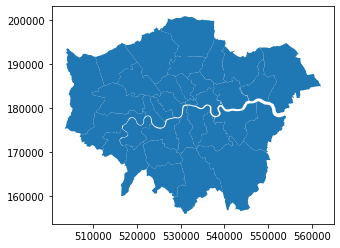

In [4]:
map_df.plot()

In [5]:
df = pd.read_csv(r'C:\Users\Mohamad Syafiq\Desktop\London.csv',header=0)
df.head()

,Code,borough,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [6]:
# select only the coluns that we want for the map
df = df[['borough','Happiness_score_2011-14_(out_of_10)', 'Anxiety_score_2011-14_(out_of_10)', 'Population_density_(per_hectare)_2017', 'Mortality_rate_from_causes_considered_preventable_2012/14']]

# those are really terrible column names. let's rename them to something simpler
score = df.rename(index=str, columns={"Happiness_score_2011-14_(out_of_10)": "happiness",
                                      "Anxiety_score_2011-14_(out_of_10)": "anxiety",
                                      "Population_density_(per_hectare)_2017": "pop_density_per_hectare",
                                      "Mortality_rate_from_causes_considered_preventable_2012/14": 'mortality'})

# check dat dataframe
score.head()

,borough,happiness,anxiety,pop_density_per_hectare,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


In [7]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(score.set_index('borough'))

merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",7.4,3.4,49.0,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.3,3.6,63.3,164


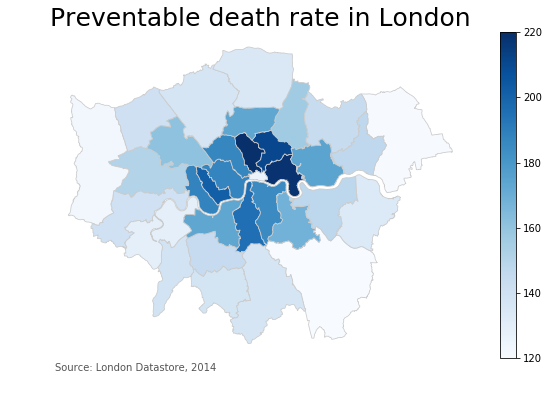

In [8]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop_density_per_hectare'

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Preventable death rate in London', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

# Changing Data to Malaysia

You can build your Geojson file in geojsonio webpage : http://geojson.io/#map=2/20.0/0.0

In [11]:
map_df1 = gpd.read_file(r"C:\Users\Mohamad Syafiq\Desktop\Malaysia3.json")

In [12]:
map_df1.head(16)

,State,geometry
0,Johor,"POLYGON ((102.69745 2.83057, 102.63153 2.63030..."
1,Melaka,"POLYGON ((101.97510 2.39021, 101.97081 2.38986..."
2,Negeri Sembilan,"POLYGON ((101.94695 2.40530, 101.96411 2.40187..."
3,Selangor,"POLYGON ((101.70113 2.60286, 101.73546 2.62344..."
4,Pulau Pinang,"POLYGON ((100.34225 5.57908, 100.33676 5.57157..."
5,Perlis,"POLYGON ((100.19463 6.25387, 100.20149 6.25728..."
6,Kedah,"POLYGON ((100.98495 5.71643, 100.96161 5.74376..."
7,Kelantan,"POLYGON ((102.09320 6.23612, 102.09320 6.14055..."
8,Terengganu,"POLYGON ((102.54639 5.84281, 102.54192 5.84145..."
9,Perak,"POLYGON ((100.99525 5.78065, 100.99543 5.77775..."


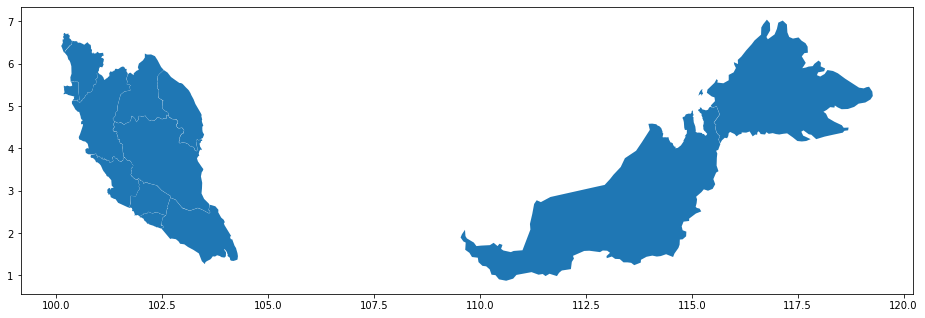

In [13]:
map_df1.plot(figsize=(16,20))

Merged data of Company Area

In [24]:
df = pd.read_csv(r'C:\Users\Mohamad Syafiq\Desktop\Negeri.csv',header=0)
df.head(15)

,Negeri,Value,Konsesi
0,Johor,"27,323",5
1,Melaka,"10,000",5
2,Negeri Sembilan,"12,000",5
3,Selangor,"34,396",25
4,Pulau Pinang,"15,000",15
5,Perlis,"14,000",15
6,Kedah,"11,965",15
7,Kelantan,"14,421",25
8,Terengganu,"10,262",25
9,Perak,"16,528",15


In [25]:
merged = map_df1.set_index('State').join(df.set_index('Negeri'))

merged.head(16)

,geometry,Value,Konsesi
State,,,
Johor,"POLYGON ((102.69745 2.83057, 102.63153 2.63030...","27,323",5
Melaka,"POLYGON ((101.97510 2.39021, 101.97081 2.38986...","10,000",5
Negeri Sembilan,"POLYGON ((101.94695 2.40530, 101.96411 2.40187...","12,000",5
Selangor,"POLYGON ((101.70113 2.60286, 101.73546 2.62344...","34,396",25
Pulau Pinang,"POLYGON ((100.34225 5.57908, 100.33676 5.57157...","15,000",15
Perlis,"POLYGON ((100.19463 6.25387, 100.20149 6.25728...","14,000",15
Kedah,"POLYGON ((100.98495 5.71643, 100.96161 5.74376...","11,965",15
Kelantan,"POLYGON ((102.09320 6.23612, 102.09320 6.14055...","14,421",25
Terengganu,"POLYGON ((102.54639 5.84281, 102.54192 5.84145...","10,262",25


In [26]:
merged.isnull().sum()

geometry    0
Value       0
Konsesi     0
dtype: int64

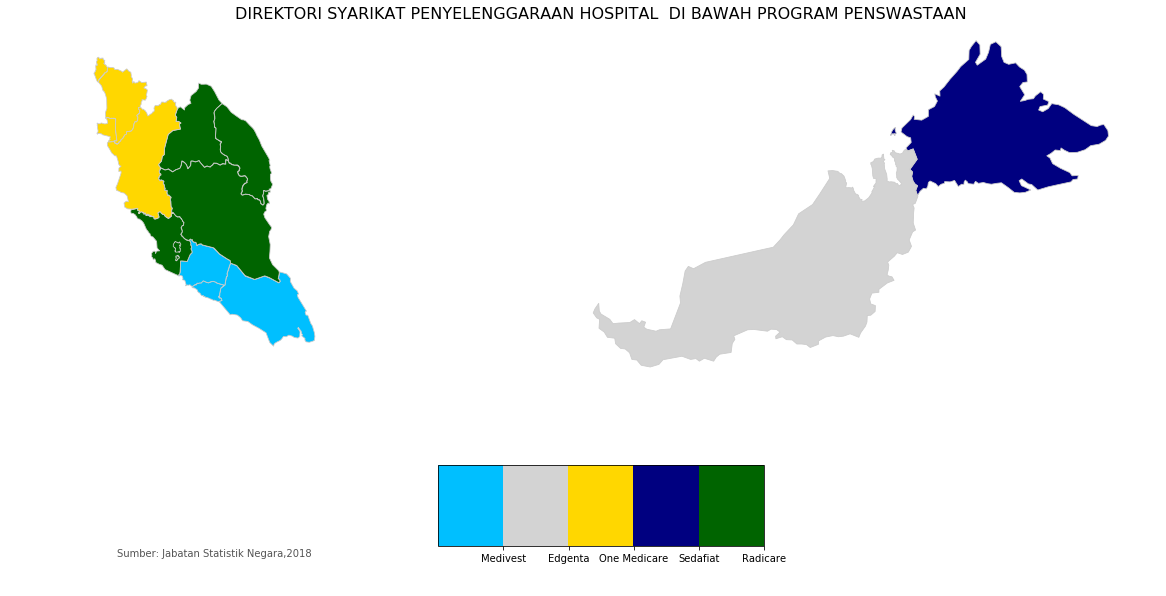

In [27]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
# set a variable that will call whatever column we want to visualise on the map
variable = 'Konsesi'

# set the range for the choropleth
vmin, vmax = 0, 25

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

cmap = mpl.colors.ListedColormap(['deepskyblue', 'lightgray', 'gold', 'navy','darkgreen'])


# create map
merged.plot(column=variable, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('DIREKTORI SYARIKAT PENYELENGGARAAN HOSPITAL  DI BAWAH PROGRAM PENSWASTAAN', \
              fontdict={'fontsize': '16',
                        'fontweight' : '5'})

# create an annotation for the  data source
ax.annotate('Sumber: Jabatan Statistik Negara,2018',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')





#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, ticks=[5,10,15,20,25],orientation='horizontal',aspect=4,fraction=0.15,spacing='proportional')
cbar.ax.set_xticklabels(['Medivest', 'Edgenta', 'One Medicare','Sedafiat','Radicare'])


# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

Tutorial 2 : Using Unemployment data

In [29]:
df = pd.read_csv(r'C:\Users\Mohamad Syafiq\Desktop\Negeri2018Unem.csv',header=0)
df.head(16)

,Tahun,Negeri,Tenaga_Buruh,Bekerja,Penganggur,Luar_tenaga_buruh,Penduduk,Pernyertaan_Buruh,Kadar_Pengangguran
0,2018,Johor,1745.1,"1,693.30",51.9,788.2,2533.3,68.9,3.0
1,2018,Kedah,936.7,909.2,27.5,538.9,1475.6,63.5,2.9
2,2018,Kelantan,712.0,683.3,28.6,465.6,1177.6,60.5,4.0
3,2018,Melaka,421.2,416.7,4.4,211.3,632.5,66.6,1.1
4,2018,Negeri Sembilan,503.6,488.6,14.9,261.9,765.5,65.8,3.0
5,2018,Pahang,735.6,716.6,19.0,369,1104.6,66.6,2.6
6,2018,Pulau Pinang,849.4,830.8,18.6,405.1,1254.5,67.7,2.2
7,2018,Perak,1069.8,"1,034.80",35.0,621.2,1691.0,63.3,3.3
8,2018,Perlis,107.6,104,3.6,64.1,171.7,62.7,3.4
9,2018,Selangor,3546.3,"3,446.70",99.6,"1,102.00",4648.3,76.3,2.8


In [30]:
merged = map_df1.set_index('State').join(df.set_index('Negeri'))

merged.head(16)

,geometry,Tahun,Tenaga_Buruh,Bekerja,Penganggur,Luar_tenaga_buruh,Penduduk,Pernyertaan_Buruh,Kadar_Pengangguran
State,,,,,,,,,
Johor,"POLYGON ((102.69745 2.83057, 102.63153 2.63030...",2018.0,1745.1,"1,693.30",51.9,788.2,2533.3,68.9,3.0
Melaka,"POLYGON ((101.97510 2.39021, 101.97081 2.38986...",2018.0,421.2,416.7,4.4,211.3,632.5,66.6,1.1
Negeri Sembilan,"POLYGON ((101.94695 2.40530, 101.96411 2.40187...",2018.0,503.6,488.6,14.9,261.9,765.5,65.8,3.0
Selangor,"POLYGON ((101.70113 2.60286, 101.73546 2.62344...",2018.0,3546.3,"3,446.70",99.6,"1,102.00",4648.3,76.3,2.8
Pulau Pinang,"POLYGON ((100.34225 5.57908, 100.33676 5.57157...",2018.0,849.4,830.8,18.6,405.1,1254.5,67.7,2.2
Perlis,"POLYGON ((100.19463 6.25387, 100.20149 6.25728...",2018.0,107.6,104,3.6,64.1,171.7,62.7,3.4
Kedah,"POLYGON ((100.98495 5.71643, 100.96161 5.74376...",2018.0,936.7,909.2,27.5,538.9,1475.6,63.5,2.9
Kelantan,"POLYGON ((102.09320 6.23612, 102.09320 6.14055...",2018.0,712.0,683.3,28.6,465.6,1177.6,60.5,4.0
Terengganu,"POLYGON ((102.54639 5.84281, 102.54192 5.84145...",2018.0,470.3,447.8,22.5,311.2,781.5,60.2,4.8


In [31]:
merged.isnull().sum()

geometry              0
Tahun                 1
Tenaga_Buruh          1
Bekerja               1
Penganggur            1
Luar_tenaga_buruh     1
Penduduk              1
Pernyertaan_Buruh     1
Kadar_Pengangguran    1
dtype: int64

D:\Program Files (x86)\Anaconda\envs\tf_gpu\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


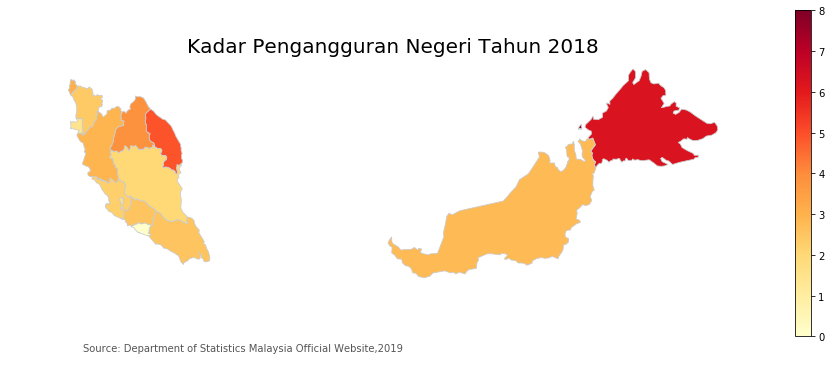

In [32]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Kadar_Pengangguran'

# set the range for the choropleth
vmin, vmax = 0, 8

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(16, 6))

# create map
merged.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Kadar Pengangguran Negeri Tahun 2018', \
              fontdict={'fontsize': '20',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: Department of Statistics Malaysia Official Website,2019',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)